In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
df = pd.read_csv("911.csv")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [17]:
df.describe()

,lat,lng,zip,e
count,663522.000000,663522.000000,583323.000000,663522.0
mean,40.158162,-75.300105,19236.055791,1.0
std,0.220641,1.672884,298.222637,0.0
min,0.000000,-119.698206,1104.000000,1.0
25%,40.100344,-75.392735,19038.000000,1.0
50%,40.143927,-75.305143,19401.000000,1.0
75%,40.229008,-75.211865,19446.000000,1.0
max,51.335390,87.854975,77316.000000,1.0


In [19]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [24]:
df["zip"]

0         19525.0
1         19446.0
2         19401.0
3         19401.0
4             NaN
           ...   
663517    19403.0
663518    19403.0
663519    19041.0
663520    19401.0
663521    19041.0
Name: zip, Length: 663522, dtype: float64

In [27]:
df["zip"].value_counts().head()

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [28]:
df["twp"]

0               NEW HANOVER
1         HATFIELD TOWNSHIP
2                NORRISTOWN
3                NORRISTOWN
4          LOWER POTTSGROVE
                ...        
663517        EAST NORRITON
663518     LOWER PROVIDENCE
663519         LOWER MERION
663520           NORRISTOWN
663521         LOWER MERION
Name: twp, Length: 663522, dtype: object

In [29]:
df["twp"].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [39]:
len(df["title"].unique())

148

In [40]:
df["title"].nunique()

148

In [47]:
def title_manipulation(x):
    return x.split()[0][:-1]

df["title"].apply(lambda x: title_manipulation(x))

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: title, Length: 663522, dtype: object

In [48]:
df["Reason"] = df["title"].apply(lambda x: title_manipulation(x))

In [51]:
df["Reason"].value_counts().head()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

C:\Users\woosal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reason', ylabel='count'>

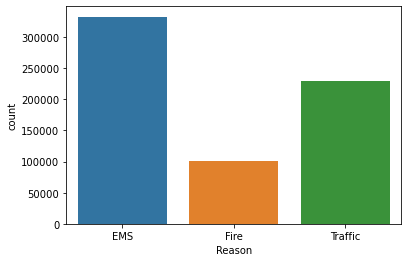

In [52]:
sns.countplot(df["Reason"])

In [59]:
type(df["timeStamp"][0])

str

In [67]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

In [68]:
type(df["timeStamp"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [72]:
print(df['timeStamp'][0])

print(df['timeStamp'][0].year)
print(df['timeStamp'][0].hour)
print(df['timeStamp'][0].minute)
print(df['timeStamp'][0].second)

2015-12-10 17:10:52
2015
17
10
52


In [73]:
df["Hour"] = df["timeStamp"].apply(lambda time: time.hour)

In [75]:
df["Day"] = df["timeStamp"].apply(lambda time: time.dayofweek)

In [76]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,3


In [77]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [78]:
df["Day"] = df["Day"].map(dmap)

In [79]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,Thu


C:\Users\woosal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


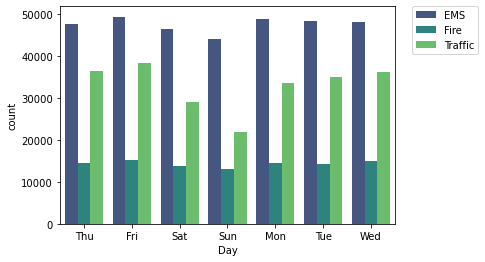

In [84]:
sns.countplot(df["Day"], hue=df["Reason"], palette="viridis")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

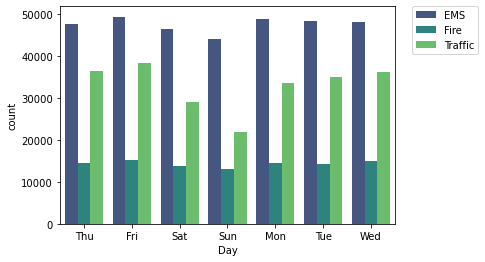

In [89]:
sns.countplot(x="Day", data=df, hue="Reason", palette="viridis")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [90]:
df["Month"] = df["timeStamp"].apply(lambda time: time.month)

In [92]:
df["Month"].value_counts()

1     62336
6     60034
3     60027
7     59832
12    57692
5     57509
2     55427
4     53671
10    51240
11    50182
8     48359
9     47213
Name: Month, dtype: int64

In [95]:
mmap = {
    1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 
    9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"
}

In [96]:
df["Month"] = df["Month"].map(mmap)

In [97]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,Thu,Dec
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,Thu,Dec
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,Thu,Dec
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,Thu,Dec
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,Thu,Dec


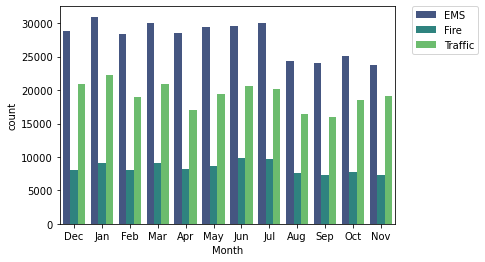

In [98]:
sns.countplot(x="Month", data=df, hue="Reason", palette="viridis")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [104]:
byMonth = df.groupby("Month").count()
#sns.lmplot(x="Month",y="twp",data=byMonth.reset_index())

In [105]:
df["Date"] = df["timeStamp"].apply(lambda time: time.date())

In [106]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day,Month,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,Thu,Dec,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,Thu,Dec,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,Thu,Dec,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,Thu,Dec,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,Thu,Dec,2015-12-10


In [108]:
df.groupby("Date").count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day,Month
Date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444


In [109]:
df.groupby("Date").count()["lat"]

Date
2015-12-10    114
2015-12-11    391
2015-12-12    402
2015-12-13    316
2015-12-14    444
             ... 
2020-07-25    318
2020-07-26    296
2020-07-27    329
2020-07-28    370
2020-07-29    217
Name: lat, Length: 1694, dtype: int64

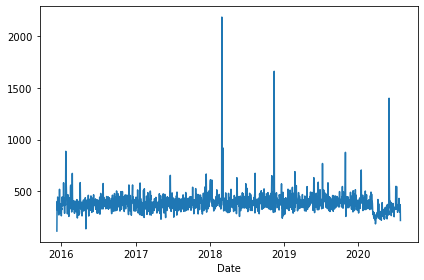

In [111]:
df.groupby("Date").count()["lat"].plot()
plt.tight_layout()

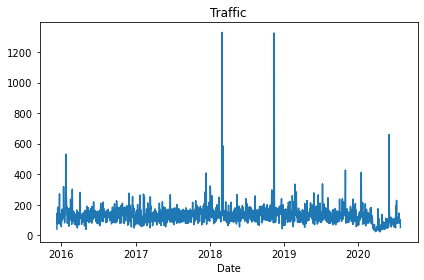

In [129]:
df[df["Reason"] == "Traffic"].groupby("Date").count()["lat"].plot()
plt.title("Traffic")
plt.tight_layout()

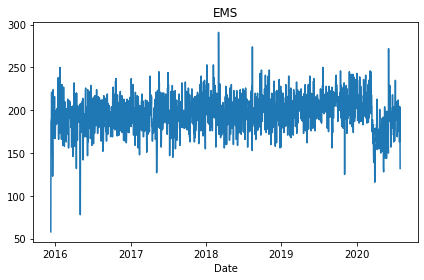

In [131]:
df[df["Reason"] == "EMS"].groupby("Date").count()["lat"].plot()
plt.title("EMS")
plt.tight_layout()

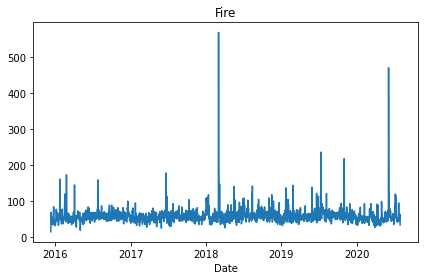

In [130]:
df[df["Reason"] == "Fire"].groupby("Date").count()["lat"].plot()
plt.title("Fire")
plt.tight_layout()

In [136]:
df.groupby(by=["Day","Hour"]).count()

lat   lng  desc   zip  title  timeStamp   twp  addr     e  Reason  \
Day Hour                                                                       
Fri 0     1983  1983  1983  1752   1983       1983  1981  1983  1983    1983   
    1     1635  1635  1635  1451   1635       1635  1632  1635  1635    1635   
    2     1449  1449  1449  1311   1449       1449  1449  1449  1449    1449   
    3     1296  1296  1296  1173   1296       1296  1296  1296  1296    1296   
    4     1339  1339  1339  1227   1339       1339  1338  1339  1339    1339   
...        ...   ...   ...   ...    ...        ...   ...   ...   ...     ...   
Wed 19    4686  4686  4686  4165   4686       4686  4684  4686  4686    4686   
    20    4116  4116  4116  3661   4116       4116  4113  4116  4116    4116   
    21    3537  3537  3537  3143   3537       3537  3530  3537  3537    3537   
    22    2826  2826  2826  2511   2826       2826  2825  2826  2826    2826   
    23    2207  2207  2207  1965   2207       2207  2204  2207  2207    2207   

          Month  Date  
Day Hour               
Fri 0      1983  1983  
    1      1635  1635  
    2      1449  1449  
    3      1296  1296  
    4      1339  1339  
...         ...   ...  
Wed 19     4686  4686  
    20     4116  4116  
    21     3537  3537  
    22     2826  2826  
    23     2207  2207  

[168 rows x 12 columns]

In [141]:
df.groupby(by=["Day","Hour"]).count()["Reason"].unstack()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


In [142]:
dayHour = df.groupby(by=["Day","Hour"]).count()["Reason"].unstack()

<AxesSubplot:xlabel='Hour', ylabel='Day'>

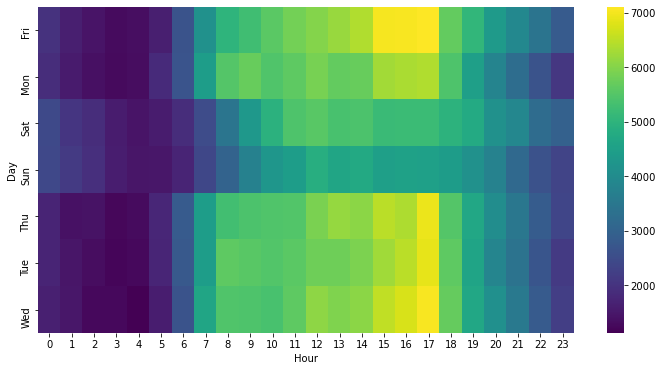

In [146]:
plt.figure(figsize=(12,6))
plt.tight_layout()
sns.heatmap(dayHour,cmap="viridis")

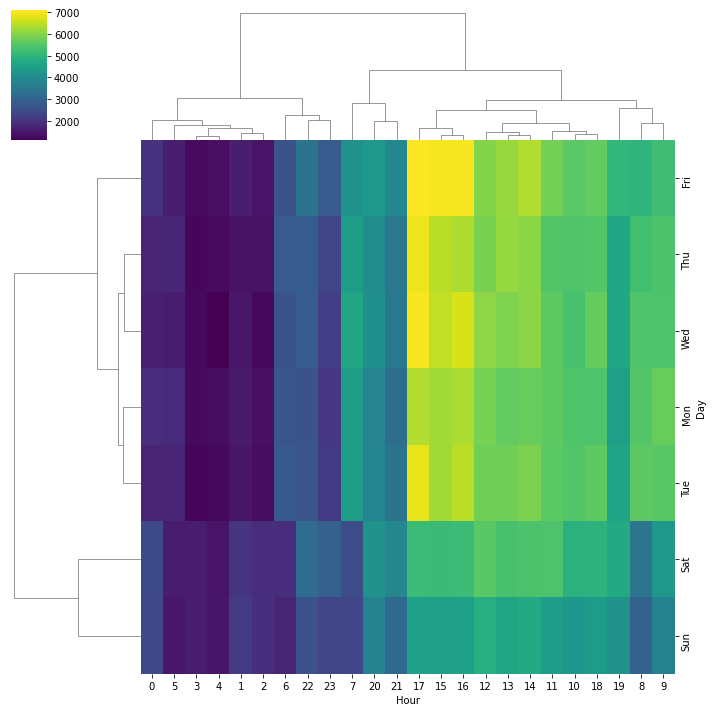

In [147]:
sns.clustermap(dayHour,cmap="viridis")

In [151]:
dayMonth = df.groupby(by=["Day","Month"]).count()["Reason"].unstack()
dayMonth

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Day,,,,,,,,,,,,
Fri,7997,7336,9305,8255,9309,8681,9207,10941,8904,8379,6934,7694
Mon,8410,6854,8492,8747,8896,9499,8511,8060,7881,6722,8075,6598
Sat,7514,6111,8592,7593,8475,7748,8198,8050,7223,6773,6609,6566
Sun,6865,5275,7165,6452,7478,7859,6837,6766,6694,5196,6316,5956
Thu,7722,7508,8151,7997,9055,8378,9489,8849,8740,8358,7482,6954
Tue,7561,7291,8305,8087,9714,9086,8349,8372,9026,7344,7948,6601
Wed,7602,7984,7682,8296,9409,8581,9443,8989,9041,7410,7876,6844


<AxesSubplot:xlabel='Month', ylabel='Day'>

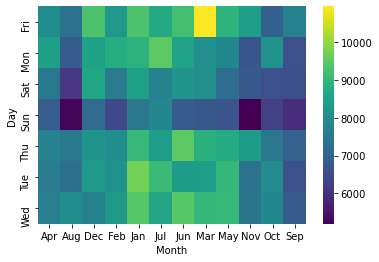

In [153]:
sns.heatmap(dayMonth,cmap="viridis")

In [ ]:
sns.heatmap(dayMonth,cmap="viridis")